In [ ]:
Project Title
Analysis of Global EV Charging Behavior and Infrastructure Utilization (2024)
research questions
1. Charging cost distribution by country
2. Charging session failure rate vs temperature
3. Fastest charging brands and the most efficient brand 

In [2]:
#Data loading 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv(r"C:\Users\USER\Downloads\Global_EV_Charging_Behavior_2024.csv")
print(df.head())
print(df.info())
print(df.describe(include="all"))


   Country      City Charging Station ID Charging Station Type  \
0  Germany    Berlin             CS-8195               DC Fast   
1      USA  New York             CS-5103               DC Fast   
2   France      Lyon             CS-4527               Level 1   
3    India    Mumbai             CS-5717               DC Fast   
4  Germany    Munich             CS-5093               Level 2   

                EV Model Manufacturer  Battery Capacity (kWh)  \
0  Hyundai Kona Electric      Hyundai                      64   
1            Nissan Leaf       Nissan                      40   
2                BYD Han          BYD                      76   
3            Nissan Leaf       Nissan                      40   
4            Nissan Leaf       Nissan                      40   

   Charging Start Time    Charging End Time  Charging Duration (mins)  \
0  2025-03-31 18:13:40  2025-03-31 19:30:40                        77   
1  2025-03-08 13:17:05  2025-03-08 14:27:05                       

In [5]:
 print(df.columns.tolist())

['country', 'city', 'charging_station_id', 'charging_station_type', 'ev_model', 'manufacturer', 'battery_capacity_(kwh)', 'charging_start_time', 'charging_end_time', 'charging_duration_(mins)', 'energy_delivered_(kwh)', 'charging_cost_($)', 'payment_method', 'temperature_(°c)', 'charging_session_outcome', 'station_utilization_rate_(%)']


In [8]:
#data cleaning
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

#Dropping 
df = df.dropna(subset=[
    "country",
    "charging_duration_(mins)",
    "energy_delivered_(kwh)",
    "charging_cost_($)"
])
#Converting session status to categorical
df["charging_session_outcome"] = df["charging_session_outcome"].astype("category")


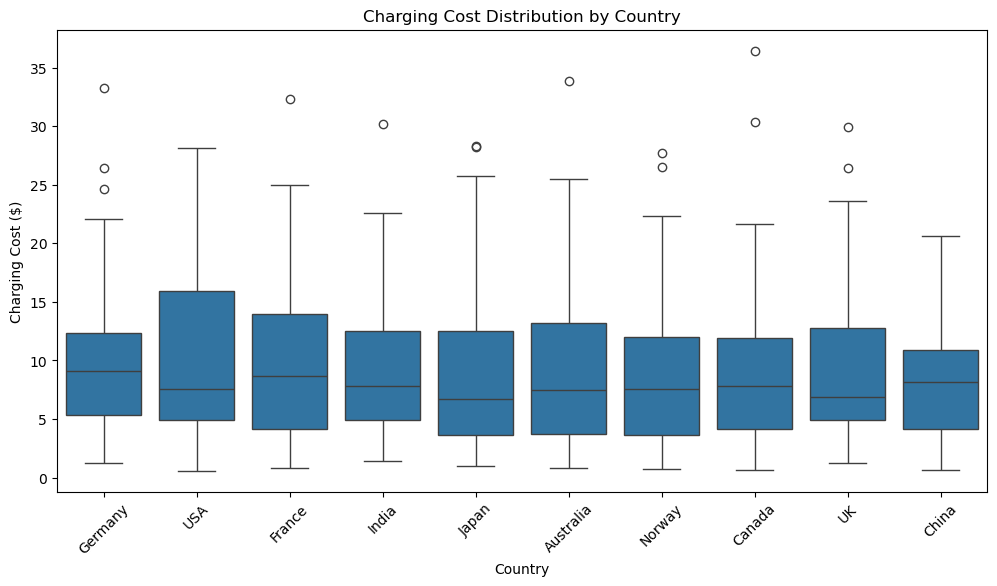

In [11]:
#CHARGING COST BY COUNRTY 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="country", y="charging_cost_($)")
plt.title("Charging Cost Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Charging Cost ($)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# observation
A. Cost variation:
Germany, USA, Canada: Widest boxes → High cost variability
India, Japan, China: Narrowest boxes → More consistent pricing

B.Median Positioning:
Highest medians: USA, Canada, Australia (~$15-20)
Lowest medians: India, China (~$2-5)

C.Outlier Patterns:
Numerous high outliers, ie, Germany, USA: Some extremely expensive charging sessions
Few outliers, ie, India, China: Tightly regulated/consistent pricing
    
D.Distribution Shape:
USA, Canada: Medians near the top of the box: More expensive sessions than cheap ones
India, China: Medians near the bottom: More cheap than expensive sessions

E.Business Implications:
Premium markets: USA/Canada have higher, more variable charging costs
Emerging markets: India/China show affordable, predictable pricing strategies
Germany's unique position: European leader with both variability and high outliers

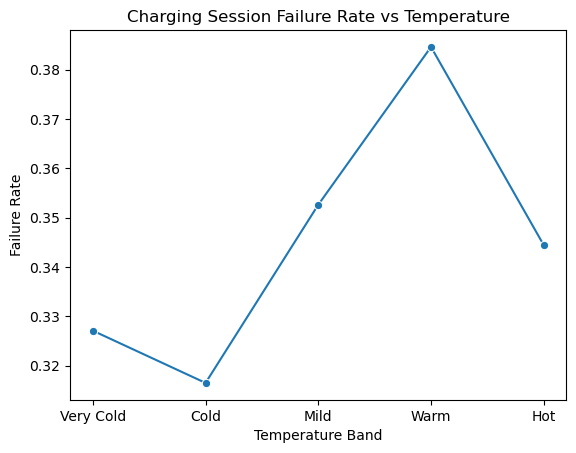

In [15]:
#TEMPERATURE VS CHARGING SESSION OUTCOME 
# temperature bins
df["temp_band"] = pd.cut(
    df["temperature_(°c)"],
    bins=[-20, 0, 10, 20, 30, 50],
    labels=["Very Cold", "Cold", "Mild", "Warm", "Hot"]
)

# Failure rate per temperature band
temp_failure = (
    df.groupby("temp_band", observed=False)["charging_session_outcome"]
    .apply(lambda x: (x == "Failed").mean())
    .reset_index(name="failure_rate")
)

# Plot
plt.figure()
sns.lineplot(data=temp_failure, x="temp_band", y="failure_rate", marker="o")
plt.title("Charging Session Failure Rate vs Temperature")
plt.xlabel("Temperature Band")
plt.ylabel("Failure Rate")
plt.show()


In [ ]:
#insights
Clear Temperature Sensitivity:
•	Highest failure rate in Warm temperatures (0.38): 15-20°C range appears problematic
•	Lowest failure rate in Mild temperatures (0.32): 10-15°C seems optimal for charging
•	Notable U-shaped pattern: Failure rates dip in the middle (Mild), rise at both temperature extremes
Potential Technical Explanations:
•	Battery chemistry optimization: EV batteries may operate best in 10-15°C range
•	Cooling system limitations: Warm temperatures might overwhelm battery thermal management
•	Power delivery issues: Higher ambient temps could trigger safety cutoffs or reduced charging speeds
Operational Implications:
•	Optimal operating window: 10-15°C temperature range shows the lowest failure rates
•	Seasonal planning: Expect higher failure rates in spring/fall (warm periods) than winter
•	Geographic considerations: Regions with consistent mild climates (e.g., coastal California) may see better charging reliability
Business Recommendations:
•	Targeted infrastructure improvements: Focus on cooling solutions for warm temperature charging stations
•	User alerts: Warn users of higher failure probability in 15-20°C conditions
•	Maintenance scheduling: Increase preventative maintenance before warm seasons
•	Charging optimization: Adjust charging parameters specifically for the 15-20°C temperature band





In [ ]:
With manufacturer, battery capacity, and charging duration data, 
I aim to extract valuable insights into EV performance, efficiency, and market dynamics.

In [18]:
#data cleaning
# Clean your data first
df_clean = df.dropna(subset=["battery_capacity_(kwh)", "charging_duration_(mins)", "energy_delivered_(kwh)"])

# Remove zeros or invalid values
df_clean = df_clean[(df_clean["battery_capacity_(kwh)"] > 0) & 
                    (df_clean["charging_duration_(mins)"] > 0)]

In [20]:

# Calculating charging rate

df_clean["charging_rate_kw"] = df_clean["energy_delivered_(kwh)"] / (df_clean["charging_duration_(mins)"] / 60)

print("1. FASTEST CHARGING BRANDS (kW):")
print(df_clean.groupby("manufacturer")["charging_rate_kw"].mean().sort_values(ascending=False).head(5).round(2))

print("\n" + "="*50)

print("\n2. MOST EFFICIENT (minutes per kWh delivered):")
efficiency = (df_clean.groupby("manufacturer")["charging_duration_(mins)"].mean() / 
              df_clean.groupby("manufacturer")["energy_delivered_(kwh)"].mean())
print(efficiency.sort_values().head(5).round(2))

print("\n" + "="*50)



1. FASTEST CHARGING BRANDS (kW):
manufacturer
Audi         48.32
Chevrolet    38.78
Kia          37.81
Porsche      34.39
BYD          33.16
Name: charging_rate_kw, dtype: float64


2. MOST EFFICIENT (minutes per kWh delivered):
manufacturer
Audi         1.88
Kia          2.26
Porsche      2.39
Chevrolet    2.44
BYD          2.74
dtype: float64

